In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Phase 1: initial search

In [2]:
df = pd.read_csv('search_result0.csv', index_col=False)
print('Total papers:',df.shape[0])
df.head(5)

Total papers: 2484


,id,title,authors,journal,year,source
0,1,visibility graph analysis of speech evoked aud...,"mozaffarilegha m., adeli h.",neuroscience letters,2019,scopus
1,2,revisiting the “paradox of stereotaxic surgery...,"magnusson j.l., leventhal d.k.",frontiers in systems neuroscience,2021,scopus
2,3,"mapping autonomic, mood and cognitive effects ...","neudorfer c., elias g.j.b., jakobs m., boutet ...",brain,2021,scopus
3,4,going deep into schizophrenia with artificial ...,"cortes-briones j.a., tapia-rivas n.i., d'souza...",schizophrenia research,2021,scopus
4,5,an introduction to cognitive psychology: proce...,"groome d., brace n., edgar g., edgar h., eysen...",an introduction to cognitive psychology: proce...,2021,scopus


The initial search results was visualized using a word-cloud:
<img src="wordcloud.png"/>

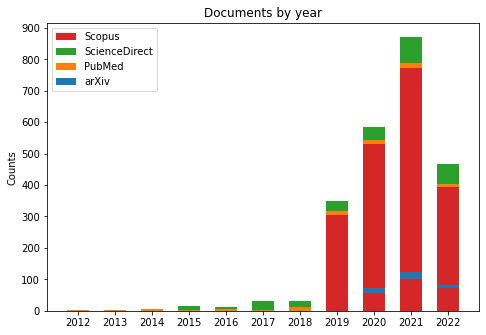

In [3]:
def plot_documents_by_year(df, set_xticks, y_ticks):

    dff = df.copy()
    scopus, science, pubmed, arxiv = [],[],[],[]

    for i in np.unique(dff.year):
        scopus.append(dff[(dff.year==i)&(dff.source=='scopus')].shape[0])
        science.append(dff[(dff.year==i)&(dff.source=='sciencedirect')].shape[0])
        pubmed.append(dff[(dff.year==i)&(dff.source=='pubmed')].shape[0])
        arxiv.append(dff[(dff.year==i)&(dff.source=='arxiv')].shape[0])

    width = 0.60
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ind = np.arange(len(np.unique(dff.year))) 
    ax.bar(ind, scopus, width, color='tab:red')
    ax.bar(ind, science, width,bottom=scopus, color='tab:green')
    ax.bar(ind, pubmed, width,bottom=scopus, color='tab:orange')
    ax.bar(ind, arxiv, width, bottom=science, color='tab:blue')
    ax.set_ylabel('Counts')
    ax.set_title('Documents by year')
    ax.set_xticks(ind,set_xticks)
    ax.set_yticks(y_ticks)
    ax.legend(labels=['Scopus', 'ScienceDirect','PubMed','arXiv'])
    plt.show()
    
plot_documents_by_year(df=df, 
                       set_xticks=('2012','2013','2014','2015','2016','2017', '2018', '2019', '2020', '2021', '2022'),
                       y_ticks=np.arange(0, 1000, 100),
                       )

### Phase 2: perform queries

- Inclusion: Paper containing keywords: *EEG* AND
(abnormal\* OR patholog\* OR classif\* OR detect\* OR decod\* OR network\* OR \*learning)

- Exclusion: Paper containing keywords:
(abnormal\* OR patholog\*)

In [4]:
def Q(word):return df.title.str.contains(word)==True

# Include/Exclude Queries
I1 = (Q('eeg')&(Q('class')|Q('decod')|Q('detect')|Q('neural')|Q('learning')))
I2 = (Q('abnormal')|Q('patholog'))
E13 = (Q('ecg')|Q('emg')|Q('mri')|Q('pcg')|Q('multi-class')|Q('multi-label')|\
       Q('real-time')|Q('seizure')|Q('bci')|Q('behavior')|Q('motor'))

df_inclusion = pd.concat([df[I1],df[I2]]).drop_duplicates()
df_exclusion = df_inclusion[~E13]
print('Papers after inclusion criteria: ',len(df_inclusion))
print('Papers after exclusion criteria: ',len(df_exclusion))

Papers after inclusion criteria:  502
Papers after exclusion criteria:  370


<ipython-input-4-38ed0e4df300>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_exclusion = df_inclusion[~E13]


In [5]:
df_exclusion.to_csv('search_result1.csv', index=False)

### Phase 3: assess eligibility

We assessed the eligibility of the papers by reading the titles and scanning their abstracts (note that the abstract has not been added to the dataframe to reduce the size) 

- Filter papers that do not describe any EEG classification/EEG pathology decoding task.
- Read all abstracts, scan full text and include papers that focuss on a binary classification problems.

The resulting papers were saved to the following csv-file:

In [6]:
df = pd.read_csv('search_result2.csv', index_col=False)
print('Total papers:',df.shape[0])
df.head(5)

Total papers: 195


,new_id,old_id,ref,title,authors,journal,year,source,phase1,phase2,epilepsy,alzheimer,schizophrenia,parkinson,depression,sleepstage,generalpathology
0,1,11,sadiq,a novel computer-aided diagnosis framework for...,"muhammad tariq sadiq, hesam akbari, siuly siul...","computers in biology and medicine,",2021,sciencedirect,1,0,0,0,0,0,0,0,0
1,2,57,bajpai,automated eeg pathology detection based on dif...,"bajpai r., yuvaraj r., prince a.a.",computers in biology and medicine,2021,scopus,1,1,0,0,0,0,0,0,1
2,3,65,rocca,automatic detection of eeg epileptiform abnorm...,"faghihpirayesh r., ruf s., rocca m.l., garner ...",proceedings of the annual international confer...,2021,scopus,1,1,1,0,0,0,0,0,0
3,4,69,sansegundo,classification of epileptic eeg recordings usi...,"rubén san-segundo, manuel gil-martín, luis fer...","computers in biology and medicine,",2019,sciencedirect,1,1,1,0,0,0,0,0,0
4,5,82,kumar,local pattern transformation based feature ext...,"abeg kumar jaiswal, haider banka,","biomedical signal processing and control,",2017,sciencedirect,1,0,1,0,0,0,0,0,0


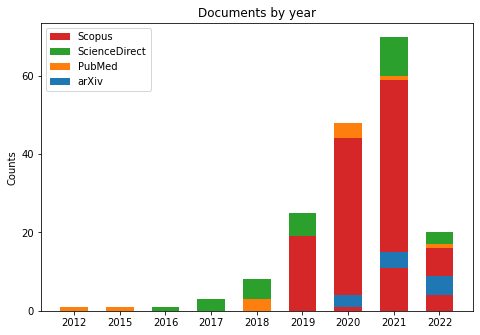

In [7]:
plot_documents_by_year(df=df, 
                       set_xticks=('2012','2015','2016','2017', '2018', '2019', '2020', '2021', '2022'),
                       y_ticks=np.arange(0, 80, 20),
                       )

### Phase 4: full text reading

The full text was read from each paper selected in phase 2, and only papers related to pathology decoding were selected in phase 3. This resulted in 114 discarded papers:

In [8]:
print('Papers after phase 2: ',df[df.phase1==1].shape[0])
print('Papers after phase 3: ',df[df.phase2==1].shape[0])

Papers after phase 2:  195
Papers after phase 3:  81


While reading these papers, the following classifications were made:

In [9]:
print('Papers focused on epilepsy: ', len(df[(df.phase2==1)&(df.epilepsy==1)]))
print('Papers focused on alzheimer: ',len(df[(df.phase2==1)&(df.alzheimer==1)]))
print('Papers focused on schizophrenia: ',len(df[(df.phase2==1)&(df.schizophrenia==1)]))
print('Papers focused on parkinson: ',len(df[(df.phase2==1)&(df.parkinson==1)]))
print('Papers focused on depression: ',len(df[(df.phase2==1)&(df.depression==1)]))
print('Papers focused on general pathology: ',len(df[(df.phase2==1)&(df.generalpathology==1)]))
print('Papers focused on other tasks: ',int(df[df.phase2==1].shape[0])-59)

Papers focused on epilepsy:  15
Papers focused on alzheimer:  2
Papers focused on schizophrenia:  17
Papers focused on parkinson:  2
Papers focused on depression:  3
Papers focused on general pathology:  20
Papers focused on other tasks:  22


In [10]:
df_classified_groups = df[(df.epilepsy==1)|(df.alzheimer==1)|\
         (df.schizophrenia==1)|(df.parkinson==1)|\
         (df.depression==1)|(df.generalpathology==1)]

In [11]:
def generate_meta_components(df):
    
    ids = [str(i) for i in range(len(df))]
    refs = df.ref.values
    meta = [{'data': {'id': refs[i], 'label':ids[i]}, 'position': {'x': 20, 'y': 20}} for i in range(len(df))]

    meta.append({'data': {'id': 'Epilepsy', 'label':'epilepsy_'}, 'position': {'x': 80, 'y': 90}})
    meta.append({'data': {'id': 'Alzheimer', 'label':'alzheimer_'}, 'position': {'x': 10, 'y': 5}})
    meta.append({'data': {'id': 'Schizophrenia', 'label':'schizophrenia_'}, 'position': {'x': 30, 'y': 40}})
    meta.append({'data': {'id': 'Parkinson', 'label':'parkinson_'}, 'position': {'x': 20, 'y': 70}})
    meta.append({'data': {'id': 'Depression', 'label':'depression_'}, 'position': {'x': 50, 'y': 50}})
    meta.append({'data': {'id': 'GeneralPathology', 'label':'generalpathology_'}, 'position': {'x': 10, 'y': 20}})
      
    for i in [str(i) for i in df[df.epilepsy==1].ref]:
        meta.append({'data': {'source': i, 'target': 'Epilepsy','label': 'epilepsy_' + i}})
    for i in [str(i) for i in df[df.alzheimer==1].ref]:
        meta.append({'data': {'source': i, 'target': 'Alzheimer','label': 'alzheimer_' + i}})
    for i in [str(i) for i in df[df.schizophrenia==1].ref]:
        meta.append({'data': {'source': i, 'target': 'Schizophrenia','label': 'schizophrenia_' + i}})
    for i in [str(i) for i in df[df.parkinson==1].ref]:
        meta.append({'data': {'source': i, 'target': 'Parkinson','label': 'parkinson_' + i}})
    for i in [str(i) for i in df[df.depression==1].ref]:
        meta.append({'data': {'source': i, 'target': 'Depression','label': 'depression_' + i}})
    for i in [str(i) for i in df[df.generalpathology==1].ref]:
        meta.append({'data': {'source': i, 'target': 'GeneralPathology','label': 'generalpathology_' + i}})
     
    style = [{'selector': 'node','style': {'label': 'data(id)'}},
            {'selector': 'edge','style': {'curve-style': 'bezier'}},
            {'selector':'#Epilepsy','style':{'background-color': '#FFCC00',"border-color": "#FFCC00","border-width": 2,"border-opacity": 1,"opacity": 1}},
            {'selector':'#Alzheimer','style':{'background-color': '#99ff00',"border-color": "#99ff00","border-width": 2,"border-opacity": 1,"opacity": 1}},
            {'selector':'#Schizophrenia','style':{'background-color': '#2c57a8',"border-color": "#2c57a8","border-width": 2,"border-opacity": 1,"opacity": 1}},
            {'selector':'#Parkinson','style':{'background-color': '#36CBF0',"border-color": "#36CBF0","border-width": 2,"border-opacity": 1,"opacity": 1}},
            {'selector':'#Depression','style':{'background-color': '#F03E36',"border-color": "#F03E36","border-width": 2,"border-opacity": 1,"opacity": 1}},
            {'selector':'#GeneralPathology','style':{'background-color': '#FF33F6',"border-color": "#FF33F6","border-width": 2,"border-opacity": 1,"opacity": 1}}]
        
    for i in refs:
        style.append({'selector': '#'+i,'style': {'source-arrow-color': '#ffeded','source-arrow-shape': 'vee','line-color': '#ffeded'}})
    return meta, style

In [12]:
#!pip install jupyter-dash
#!pip install dash-cytoscape
#!pip install dash-html-components

from jupyter_dash import JupyterDash
import dash_cytoscape as cyto
import dash_html_components as html

meta, style = generate_meta_components(df_classified_groups)

app = JupyterDash(__name__)

app.layout = html.Div([
    
cyto.Cytoscape(
        id='cytoscape-styling-9',
        layout={'name': 'cose'},  #circle, grid, concentric
        style={'width': '100%', 'height': '700px'},
        elements=meta,
        stylesheet=style,
    )
])
app.run_server(mode='inline')

<ipython-input-12-d363a5ac026f>:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
